#### Sequential말고 Functional API로 모델만들기

In [1]:
import ssl
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '운동화', '가방', '앵클부츠']

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28, 28, 1) )
testX = testX.reshape( (testX.shape[0], 28, 28, 1 ) )

In [3]:
# Funtional API로 모델 디자인
input = tf.keras.layers.Input(shape=[28,28])
flatten1 = tf.keras.layers.Flatten()(input)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
reshape1 = tf.keras.layers.Reshape( (28,28 ))(dense1) # 1차원 레이어를 고차원 레이어로 변환

concat1 = tf.keras.layers.Concatenate()([input, reshape1]) # 레이어 두개를 합쳐줌
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten2)

model = tf.keras.Model(input, output)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-01 12:08:50.579591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-01 12:08:50.579803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


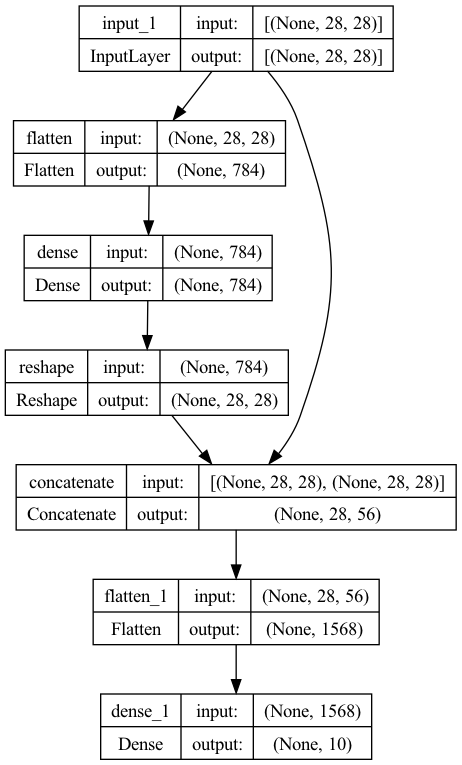

In [4]:
# 모델을 시각적으로 보기
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [5]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

Epoch 1/3


2023-06-01 12:08:52.965655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.4736 - acc: 0.8310

2023-06-01 12:09:03.461760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.4736 - acc: 0.8310 - val_loss: 0.4335 - val_acc: 0.8391
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3586 - acc: 0.8686 - val_loss: 0.3788 - val_acc: 0.8642
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3241 - acc: 0.8812 - val_loss: 0.3912 - val_acc: 0.8605


In [6]:
score = model.evaluate(testX, testY)
print(score)

313/313 [==============================] - 1s 4ms/step - loss: 0.3912 - acc: 0.8605
[0.3912346065044403, 0.8604999780654907]
